# Excercise 03: PCA

## Instructions for the 3rd seminar
In the dataset Countries, there are data of employment in particular sectors in
1979. Analyze associations in employment between particular sectors (variables) using
PCA.   
Assess how the particular countries (objects) are different in terms of economical
structure. In the beginning, standardize the data.   
Work with all variables (There are 8
variables. Vector of these variables shall be further signed as X.)

## 1 EDA and data transformations

In [3]:
# load the data
import pandas as pd
countries_data = pd.read_csv("../Data/countries.csv", encoding="latin-1").set_index("Unnamed: 0")
countries_data.columns = countries_data.columns.str.replace(".", "_")
countries_data


C:\Users\A200083283\AppData\Local\Temp\ipykernel_17536\1017226599.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  countries_data.columns = countries_data.columns.str.replace(".", "_")


,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
Unnamed: 0,,,,,,,,
Belgie,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6
Dánsko,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2
Francie,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6
Záp. Nìmecko,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3
Irsko,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8
Itálie,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1
Lucembursko,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2
Nizozemí,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5
Velká Británie,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3


In [6]:
# descriptive stats
countries_data.describe()

,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000


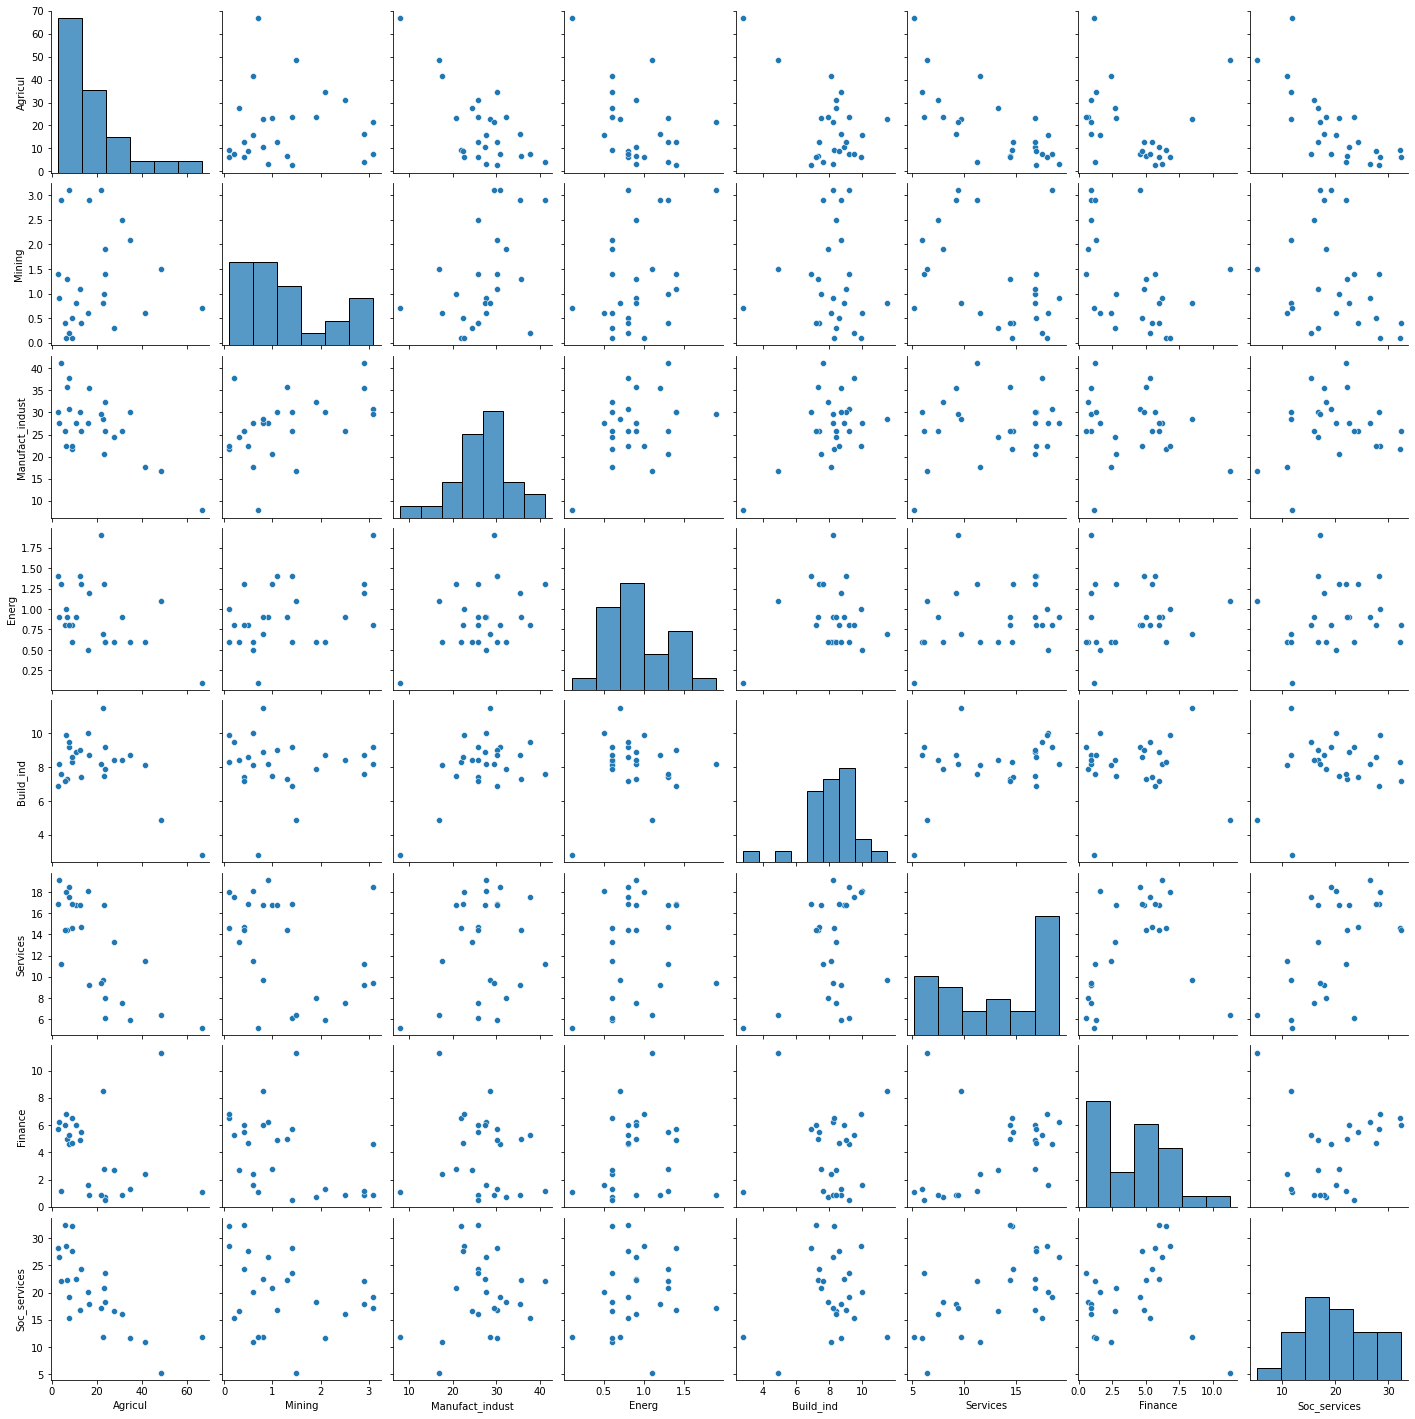

In [7]:
# pari plots of all variables
import seaborn as sns
sns.pairplot(countries_data)

## 2 Justifying the PCA

<AxesSubplot:>

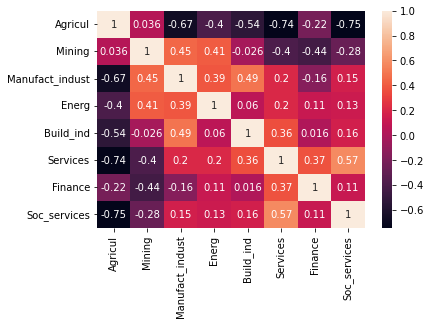

In [8]:
# visualizing the correlations
sns.heatmap(countries_data.corr(), annot=True)

I can say that the correlation matrix is sufficiently different from the unit matrix. This means the PCA is appropriate

At first, I perform the standardization using the sklearn's StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_countries_data = pd.DataFrame(scaler.fit_transform(X=countries_data))
std_countries_data.columns = countries_data.columns.copy()
std_countries_data

,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012
5,-0.211928,-0.687386,0.086196,-1.105126,1.136949,1.146198,-0.872073,0.011486
6,-0.749821,1.940856,0.551875,-0.291920,0.641173,1.235356,0.218018,-0.122904
7,-0.841656,-1.213035,-0.655981,0.250217,1.074977,1.123908,1.017419,1.265795
8,-1.077805,0.153651,0.464560,1.334492,-0.784185,0.878723,0.617719,1.235930
9,-0.421837,-0.161738,0.464560,1.334492,0.517228,0.856434,0.327027,-0.481278


Not surprising - the correlation matrix of or rescaled data set is the very same

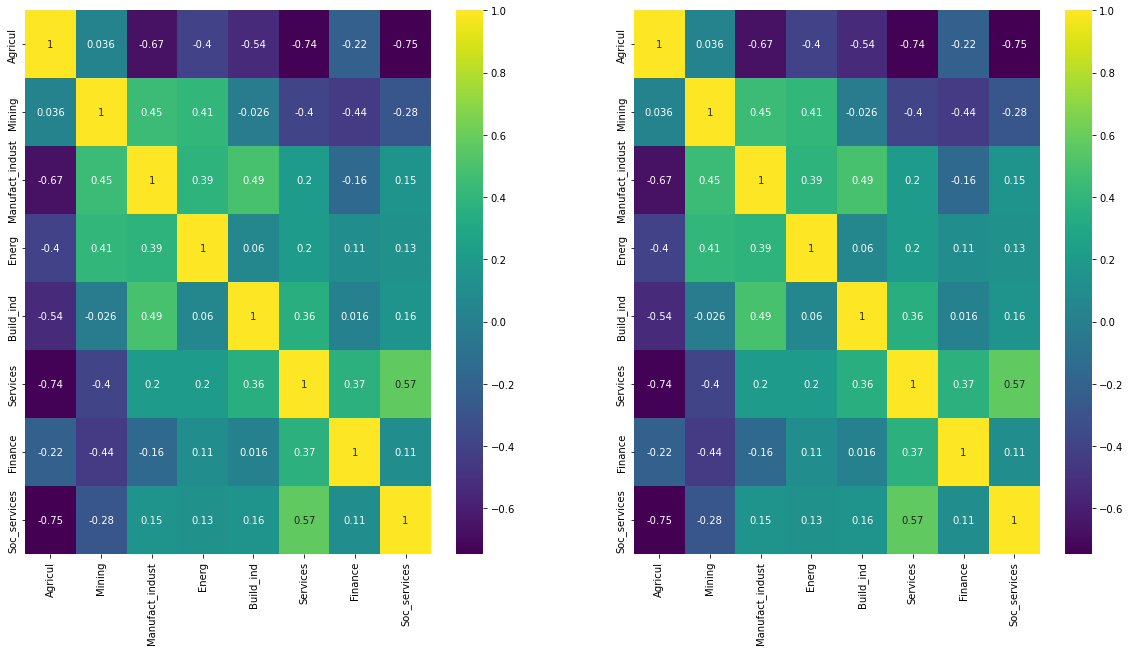

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
sns.heatmap(std_countries_data.corr(), ax=ax1, annot=True, cmap='viridis')
sns.heatmap(countries_data.corr(), ax=ax2, annot=True, cmap='viridis')
plt.show()

<AxesSubplot:>

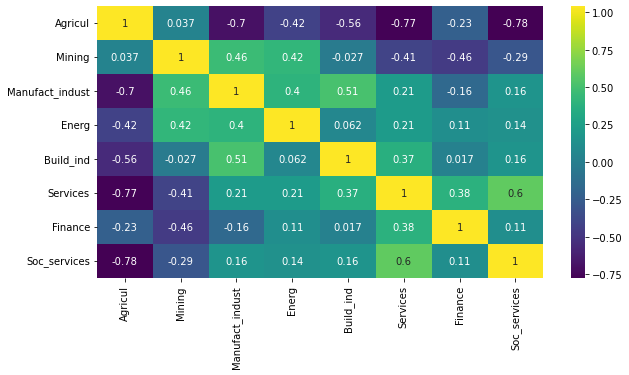

In [10]:
sns.heatmap(std_countries_data.cov(), annot=True, cmap='viridis')

And furthermore: the covariance matrix of standardized data set is equivalent to the correlation matrix

## 3 Eigenvalues and Eigenvectors

Here we compute the eigen- values and vectors

In [99]:
import numpy as np
eigen_vals, eigen_vect = np.linalg.eig(std_countries_data.corr())
print(f"Eigen values: \n{eigen_vals}\n"
"\n"
f"Eigen vectors: \n{eigen_vect}" )

Eigen values: 
[3.12126356e+00 2.04699129e+00 1.04658133e+00 8.48819875e-01
 1.75982213e-03 3.97830641e-01 2.23608922e-01 3.13144563e-01]

Eigen vectors: 
[[ 0.55742936  0.04856193  0.0152442  -0.09971546  0.79850528  0.19679979
   0.01756224 -0.00945623]
 [ 0.06622652 -0.63536406  0.16511982  0.0587939   0.0477742  -0.14108209
  -0.73383738  0.02239305]
 [-0.34599938 -0.4565332  -0.14055175 -0.14807077  0.3572455  -0.47388744
   0.42541638 -0.31146328]
 [-0.24143758 -0.3223398   0.6730433  -0.02618831  0.04651816  0.49000199
   0.32145305  0.19630049]
 [-0.33718653 -0.11905508 -0.5250223  -0.50338841  0.11098617  0.35249252
  -0.1330993   0.43450949]
 [-0.45462924  0.26130841  0.03764582  0.02002179  0.21401596  0.36003052
  -0.33265677 -0.66115562]
 [-0.15996555  0.40190133  0.47125975 -0.55324514  0.1248275  -0.44271527
  -0.20196612  0.17986488]
 [-0.40113265  0.19403057 -0.02469014  0.63569519  0.39574739 -0.1637824
  -0.08773167  0.4534195 ]]


In [101]:
eigen_vals[::-1]

array([3.13144563e-01, 2.23608922e-01, 3.97830641e-01, 1.75982213e-03,
       8.48819875e-01, 1.04658133e+00, 2.04699129e+00, 3.12126356e+00])

In the following step, I calculate the share of variance extracted by the particular PC

In [110]:
pca_df = pd.DataFrame({
    "PC": [f"PC_{i+1}" for i in range(len(eigen_vals))],
    "Eigen Value": np.sort(eigen_vals)[::-1],
    "Cumulative Variance Share Explained": np.cumsum(eigen_vals)/sum(eigen_vals),
    "Variance Share Added": np.sort(eigen_vals)[::-1]/sum(eigen_vals)
})

In [111]:
pca_df

,PC,Eigen Value,Cumulative Variance Share Explained,Variance Share Added
0,PC_1,3.121264,0.390158,0.390158
1,PC_2,2.046991,0.646032,0.255874
2,PC_3,1.046581,0.776855,0.130823
3,PC_4,0.848820,0.882957,0.106102
4,PC_5,0.397831,0.883177,0.049729
5,PC_6,0.313145,0.932906,0.039143
6,PC_7,0.223609,0.960857,0.027951
7,PC_8,0.001760,1.000000,0.000220


The following scree plot shows the share of variance explained by each PC:

## 4 Selecting the optimal number of PC

<AxesSubplot:xlabel='PC', ylabel='Variance Share Added'>

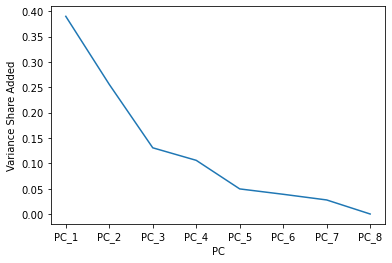

In [112]:
from matplotlib import pyplot as plt
sns.lineplot(x=pca_df['PC'], y=pca_df['Variance Share Added'])

The first three eigen values have eigen value > 1

In [113]:
pca_df.loc[pca_df['Eigen Value'] > 1]

,PC,Eigen Value,Cumulative Variance Share Explained,Variance Share Added
0,PC_1,3.121264,0.390158,0.390158
1,PC_2,2.046991,0.646032,0.255874
2,PC_3,1.046581,0.776855,0.130823


Also at least first 3 PC are needed to explain at least 75 % of variance

In [116]:
pca_df.loc[pca_df['Cumulative Variance Share Explained'] < .80]

,PC,Eigen Value,Cumulative Variance Share Explained,Variance Share Added
0,PC_1,3.121264,0.390158,0.390158
1,PC_2,2.046991,0.646032,0.255874
2,PC_3,1.046581,0.776855,0.130823


## 5 PC-transformations

In the following step, I transform the original dataset using the first 3 PC

In [122]:
from sklearn.decomposition import PCA
pca = PCA(.75).fit(std_countries_data)

var_r = 0
n_steps = 0
while var_r < .75:
    print(f"Total explained variance ration is: {var_r + pca.explained_variance_ratio_[n_steps]: .4f} \n"
          f"N.{n_steps + 1} princ. component had explained {pca.explained_variance_ratio_[n_steps]: .4f}\n")
    var_r += pca.explained_variance_ratio_[n_steps]
    n_steps+= 1

pca = PCA(n_steps)
pca.fit(std_countries_data)

Total explained variance ration is:  0.3902 
N.1 princ. component had explained  0.3902

Total explained variance ration is:  0.6460 
N.2 princ. component had explained  0.2559

Total explained variance ration is:  0.7769 
N.3 princ. component had explained  0.1308



PCA(n_components=3)

Using sklearn:

In [121]:
pca_std_countries = pd.DataFrame(pca.fit_transform(std_countries_data), columns=[f"pc_{i+1}" for i in range(pca.n_components_)])
pca_std_countries

,pc_1,pc_2,pc_3
0,-1.779771,-1.020331,0.289352
1,-1.049112,-2.157535,-0.311882
2,-1.169442,-0.786953,0.014981
3,-1.048829,0.287978,0.258226
4,-0.035134,-0.378953,0.845135
5,-0.696228,-0.559217,-1.837675
6,-1.173303,1.117166,-0.149345
7,-1.926875,-1.768879,-0.026381
8,-1.803221,-0.018837,1.547202
9,-1.151809,0.359705,0.726422


Using np linear algebra operations, we can obtain the PC transformation simply as a dot product of original data set and an
eigen vector

In [123]:
np.dot(std_countries_data, eigen_vect)[:, :n_steps]

array([[-1.77977097,  1.02033077,  0.28935222],
       [-1.04911225,  2.15753531, -0.31188204],
       [-1.16944194,  0.78695262,  0.01498123],
       [-1.04882919, -0.28797846,  0.25822617],
       [-0.03513399,  0.37895291,  0.84513477],
       [-0.6962275 ,  0.55921701, -1.83767545],
       [-1.17330253, -1.11716583, -0.14934473],
       [-1.92687477,  1.76887878, -0.02638068],
       [-1.80322055,  0.01883739,  1.54720244],
       [-1.15180917, -0.35970503,  0.72642197],
       [-0.844588  ,  0.78253136,  1.08877781],
       [ 2.23867191,  0.82638428, -0.6918401 ],
       [-1.10528024,  1.39078721, -0.25961753],
       [ 0.76911986,  0.81669696, -0.95079703],
       [ 0.0313049 ,  0.38062782, -0.79587211],
       [-1.21170405,  1.5024159 ,  0.28798552],
       [-1.5021008 ,  0.26659774, -0.76805638],
       [ 5.75760029,  1.78214685,  0.08276862],
       [ 1.00216055, -1.30403901, -1.06658932],
       [-0.02405971, -2.70008404, -0.08577591],
       [-1.06808753, -2.84218652,  0.378

Unsurprisingly, both operations yield the same result

## 6 Correlations between original variables and PCs

I find it useful to visualize the correlations using heatmap

<AxesSubplot:>

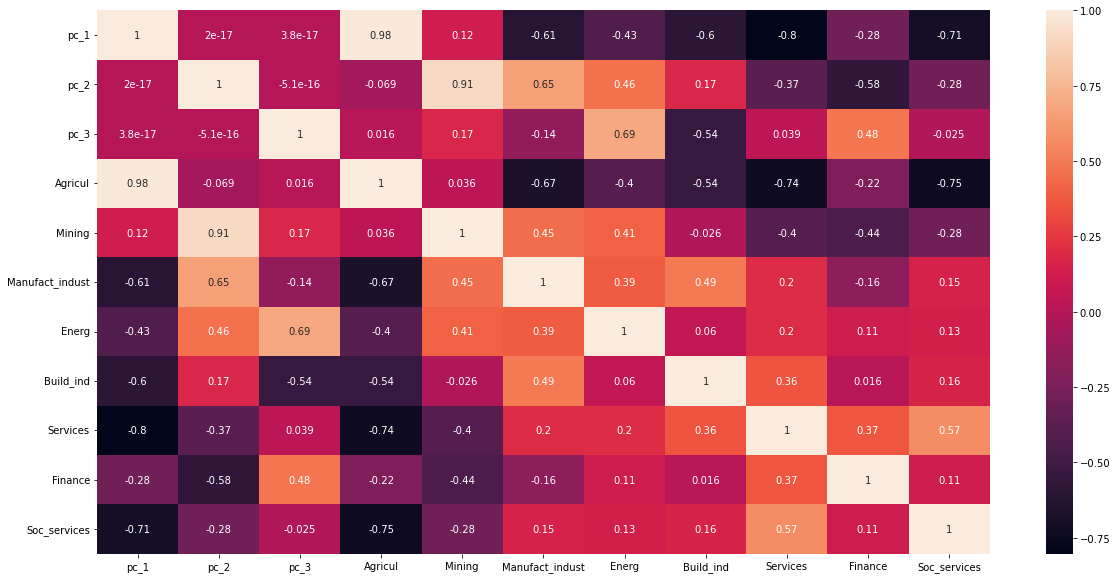

In [127]:
plt.subplots(1,1, figsize=(20, 10))
sns.heatmap(pd.concat([pca_std_countries, std_countries_data], axis=1).corr(), annot=True)

We may see that all PCs are uncorrelated. From the quick look at correlation coefficients, it is apparent that *related*
industries exhibit similar behavior (e.g. Building and Manufacturing)

## 8 Communalities

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

reg = model.fit(std_countries_data[['Finance']], pca_std_countries)
reg.score(std_countries_data[['Finance']], pca_std_countries)

0.2256868267813013

In [ ]:
pca_std_countries

,pc_1,pc_2,pc_3,pc_4
0,-1.779771,-1.020331,0.289352,-0.268115
1,-1.049112,-2.157535,-0.311882,-0.746334
2,-1.169442,-0.786953,0.014981,0.353094
3,-1.048829,0.287978,0.258226,-0.186759
4,-0.035134,-0.378953,0.845135,-0.605466
5,-0.696228,-0.559217,-1.837675,0.062709
6,-1.173303,1.117166,-0.149345,0.381964
7,-1.926875,-1.768879,-0.026381,0.173665
8,-1.803221,-0.018837,1.547202,-0.869040
9,-1.151809,0.359705,0.726422,0.801273


In [ ]:
std_countries_data

,Agricul,Mining,Manufact_indust,Energ,Build_ind,Services,Finance,Soc_services
0,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082
1,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288
2,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792
3,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996
4,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012
5,-0.211928,-0.687386,0.086196,-1.105126,1.136949,1.146198,-0.872073,0.011486
6,-0.749821,1.940856,0.551875,-0.291920,0.641173,1.235356,0.218018,-0.122904
7,-0.841656,-1.213035,-0.655981,0.250217,1.074977,1.123908,1.017419,1.265795
8,-1.077805,0.153651,0.464560,1.334492,-0.784185,0.878723,0.617719,1.235930
9,-0.421837,-0.161738,0.464560,1.334492,0.517228,0.856434,0.327027,-0.481278


In [ ]:
pca_std_countries

,pc_1,pc_2,pc_3,pc_4
0,-1.779771,-1.020331,0.289352,-0.268115
1,-1.049112,-2.157535,-0.311882,-0.746334
2,-1.169442,-0.786953,0.014981,0.353094
3,-1.048829,0.287978,0.258226,-0.186759
4,-0.035134,-0.378953,0.845135,-0.605466
5,-0.696228,-0.559217,-1.837675,0.062709
6,-1.173303,1.117166,-0.149345,0.381964
7,-1.926875,-1.768879,-0.026381,0.173665
8,-1.803221,-0.018837,1.547202,-0.869040
9,-1.151809,0.359705,0.726422,0.801273


In [131]:
from sklearn.linear_model import LinearRegression
def compute_communalities(y, X):
    
    model = LinearRegression()
    reg = model.fit(y, X)
    r_2 = reg.score(y, X)

    return r_2


In [136]:
pca_std_countries

,pc_1,pc_2,pc_3
0,-1.779771,-1.020331,0.289352
1,-1.049112,-2.157535,-0.311882
2,-1.169442,-0.786953,0.014981
3,-1.048829,0.287978,0.258226
4,-0.035134,-0.378953,0.845135
5,-0.696228,-0.559217,-1.837675
6,-1.173303,1.117166,-0.149345
7,-1.926875,-1.768879,-0.026381
8,-1.803221,-0.018837,1.547202
9,-1.151809,0.359705,0.726422


In [140]:
print(compute_communalities(y=std_countries_data[['Soc_services']], X=pca_std_countries))

0.19331241658149625


In [ ]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 7,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

## 8 Projecting variables into PC

In [148]:
data_projection = pd.concat([pca_std_countries, std_countries_data], axis=1).corr().iloc[3:, :2].reset_index()

In [149]:
data_projection

,index,pc_1,pc_2
0,Agricul,0.984816,-0.069479
1,Mining,0.117003,0.909035
2,Manufact_indust,-0.611281,0.653176
3,Energ,-0.426550,0.461182
4,Build_ind,-0.595711,0.170336
5,Services,-0.803198,-0.373862
6,Finance,-0.282613,-0.575013
7,Soc_services,-0.708685,-0.277606


<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

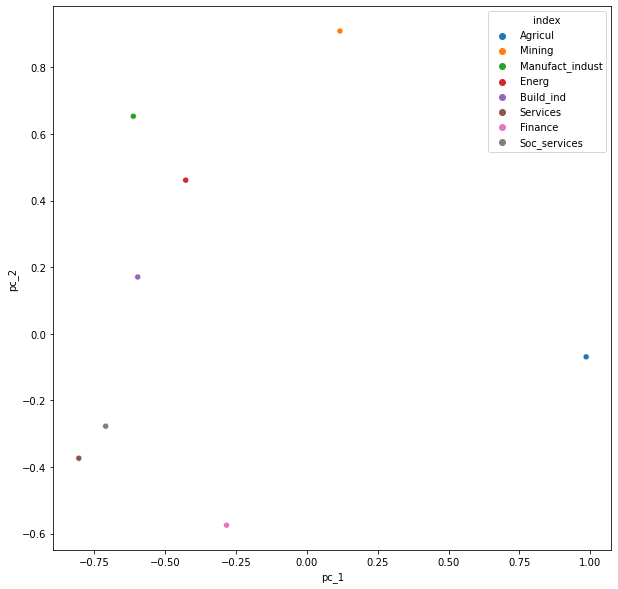

In [152]:
plt.subplots(1,1, figsize=(10, 10))
sns.scatterplot(data=data_projection, x='pc_1', y='pc_2', hue='index')

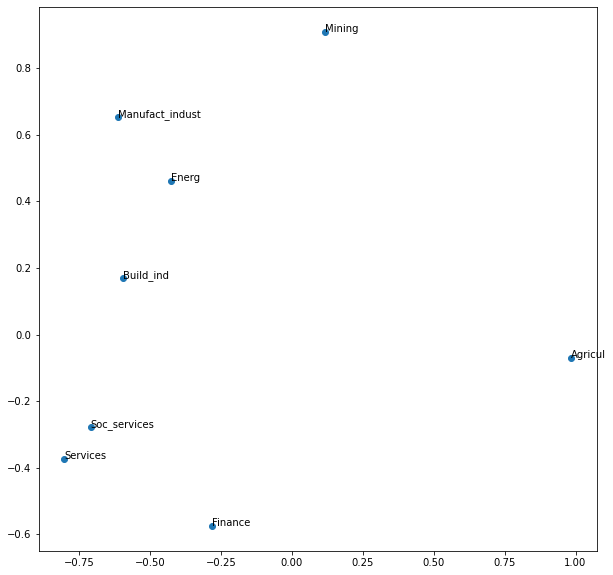

In [154]:
plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(data_projection['pc_1'], data_projection['pc_2'])

for i, txt in enumerate(data_projection['index']):
    plt.annotate(txt, (data_projection['pc_1'][i], data_projection['pc_2'][i]))